In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf

In [2]:
warnings.filterwarnings('ignore')

In [9]:
url = 'datasets/AXISBANK.csv'
df = pd.read_csv(url, parse_dates=['Date'])
print(df.shape)
df

(5306, 15)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.70,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.00,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.40,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.90,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.00,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,AXISBANK,EQ,671.35,694.0,703.80,684.50,699.50,700.45,695.33,21646184,1.505120e+15,286480.0,5949937.0,0.2749
5302,2021-04-27,AXISBANK,EQ,700.45,691.1,703.90,684.10,700.90,699.55,692.83,46559967,3.225830e+15,289445.0,18080082.0,0.3883
5303,2021-04-28,AXISBANK,EQ,699.55,708.0,712.50,688.15,705.95,708.15,701.92,54060587,3.794635e+15,507747.0,17851331.0,0.3302
5304,2021-04-29,AXISBANK,EQ,708.15,712.0,726.90,707.00,717.10,719.40,717.41,25939327,1.860920e+15,312079.0,7357520.0,0.2836


<Axes: >

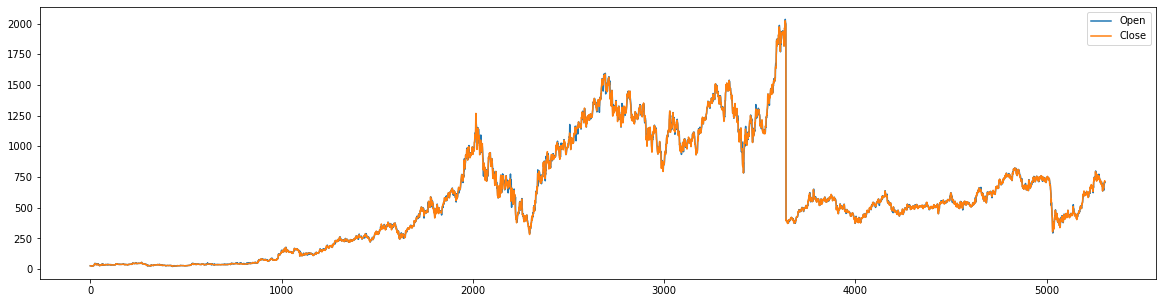

In [13]:
df[['Open','Close']].plot(figsize=(20, 5))

In [17]:
output = pd.DataFrame(df.Close)
output

,Close
0,26.70
1,26.85
2,26.30
3,25.95
4,24.80
...,...
5301,700.45
5302,699.55
5303,708.15
5304,719.40


In [18]:
features= ['Open', 'High']
df[features]

,Open,High
0,26.7,26.70
1,27.0,28.70
2,26.0,27.75
3,25.8,27.00
4,25.0,26.00
...,...,...
5301,694.0,703.80
5302,691.1,703.90
5303,708.0,712.50
5304,712.0,726.90


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform = pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform

,Open,High
0,0.002831,0.001486
1,0.002980,0.002476
2,0.002483,0.002006
3,0.002384,0.001634
4,0.001987,0.001139
...,...,...
5301,0.334260,0.336792
5302,0.332820,0.336841
5303,0.341214,0.341100
5304,0.343201,0.348231


In [28]:
from sklearn.model_selection import TimeSeriesSplit
timesplit = TimeSeriesSplit()
for train_index, test_index in timesplit.split(feature_transform):
    X_train, X_test = feature_transform.iloc[train_index], feature_transform.iloc[test_index]
    y_train, y_test = output.iloc[train_index], output.iloc[test_index]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4422, 2) (4422, 1)
(884, 2) (884, 1)


In [29]:
# process for lstm
trainX = np.array(X_train)
testX = np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
print(X_train.shape) # 4422 rows, 1 col, 2 inputs
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])
print(X_test.shape) # 4422 rows, 1 col, 2 inputs

(4422, 2)
(4422, 1, 2)
(884, 1, 2)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4480      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 4651 (18.17 KB)
Trainable params: 4651 (18.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


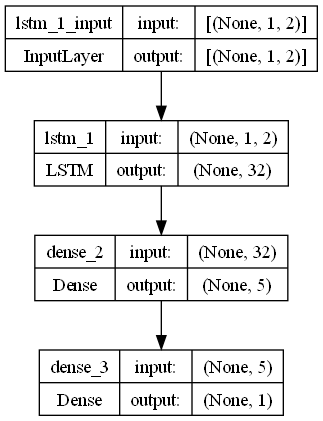

In [32]:
lstm = tf.keras.Sequential()
lstm.add(tf.keras.layers.LSTM(32, activation='relu', return_sequences=False, input_shape=(1, trainX.shape[1])))
lstm.add(tf.keras.layers.Dense(5, activation='relu'))
lstm.add(tf.keras.layers.Dense(1))
lstm.summary()
tf.keras.utils.plot_model(lstm, show_shapes=True, show_layer_names=True)

In [34]:
lstm.compile(loss='mean_squared_error', optimizer='adam')

In [36]:
history = lstm.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, shuffle=False)

Epoch 1/50
553/553 [==============================] - 3s 5ms/step - loss: 3081.6978
Epoch 2/50
553/553 [==============================] - 3s 6ms/step - loss: 2370.2202
Epoch 3/50
553/553 [==============================] - 3s 5ms/step - loss: 2015.6628
Epoch 4/50
553/553 [==============================] - 3s 6ms/step - loss: 1810.7692
Epoch 5/50
553/553 [==============================] - 3s 5ms/step - loss: 1675.6545
Epoch 6/50
553/553 [==============================] - 3s 5ms/step - loss: 1580.5632
Epoch 7/50
553/553 [==============================] - 3s 5ms/step - loss: 1511.2158
Epoch 8/50
553/553 [==============================] - 3s 5ms/step - loss: 1458.0907
Epoch 9/50
553/553 [==============================] - 3s 5ms/step - loss: 1414.7201
Epoch 10/50
553/553 [==============================] - 3s 6ms/step - loss: 1377.2500
Epoch 11/50
553/553 [==============================] - 3s 6ms/step - loss: 1343.6095
Epoch 12/50
553/553 [==============================] - 3s 6ms/step - loss:

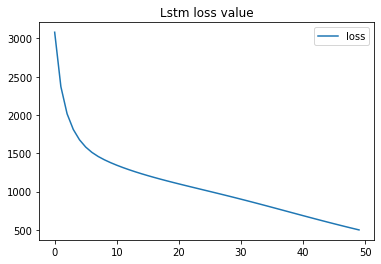

In [37]:
plt.plot(history.history['loss'], label='loss')
plt.title("Lstm loss value")
plt.legend()
plt.show()

In [39]:
# lstm model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error
y_pred = lstm.predict(X_test)
print("Metrics")
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred)*100)

28/28 [==============================] - 0s 4ms/step
Metrics
422.67942605000326
16.631947961867663
96.92364568742087


139/139 [==============================] - 1s 4ms/step


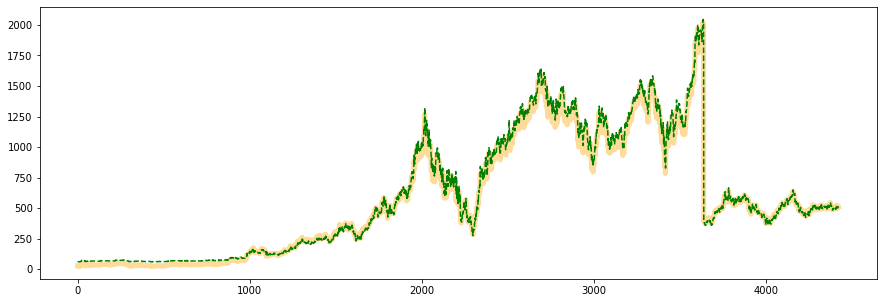

In [44]:
# visualize 
y_train_pred = lstm.predict(X_train)
plt.figure(figsize=(15,5))
plt.title("Trained Data")
plt.plot(y_train.values, color='orange', label='actual', linewidth=5, alpha=.4)
plt.plot(y_train_pred, color='green', label='predicted', linestyle='--')
plt.show()

28/28 [==============================] - 0s 4ms/step


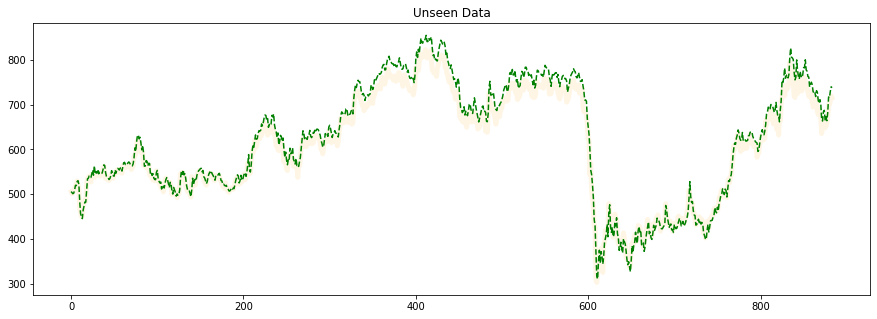

In [46]:
y_test_pred = lstm.predict(X_test)
plt.figure(figsize=(15,5))
plt.title("Unseen Data")
plt.plot(y_test.values, color='orange', label='actual', linewidth=5, alpha=.1)
plt.plot(y_test_pred, color='green', label='predicted', linestyle='--')
plt.show()

3/3 [==============================] - 0s 6ms/step


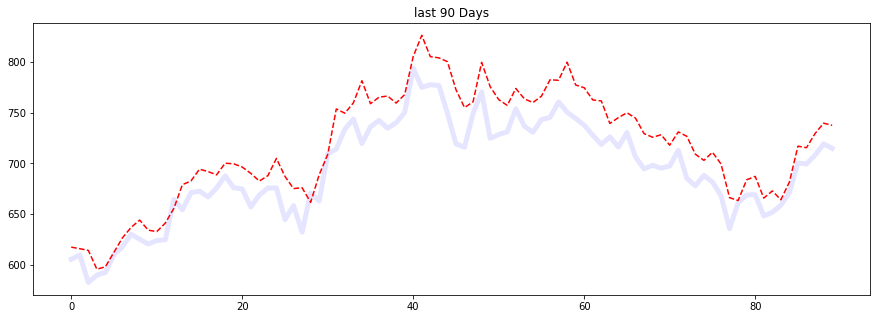

In [49]:
# last 90 stock predict
n_future=90
forecast = lstm.predict(X_test[-n_future:]) # slicing
# visualize
plt.figure(figsize=(15,5))
plt.title(f"last {n_future} Days")
plt.plot(y_test[-n_future:].values, color='blue', label='actual', linewidth=5, alpha=.1)
plt.plot(forecast, color='red', label='predicted', linestyle='--')
plt.show()